В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [99]:
import numpy as np

In [100]:
x = [1,3,4]
sum(x)

8

In [118]:
sqr_x = [el**2 for el in x]
sum(sqr_x)

26

In [117]:
new_x = [(el -1)**2 for el in x]
sum(new_x)

13

**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [103]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [104]:
purchases_mean = sum(sum_purchases) / len(sum_purchases)
purchases_mean

667.95

In [105]:
np.mean(sum_purchases)

667.95

**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [106]:
(sorted(sum_purchases)[len(sum_purchases) // 2] + sorted(sum_purchases)[len(sum_purchases) // 2 -1]) / 2

319.0

In [107]:
np.median(sum_purchases)

319.0

Відповідь: Медіану використовувала б у випадку коли датасет містить широку варіацію, викиди. В такому випадку вибіркове середнє не є репрезентативним. І навпаки якщо дані симетричні та варіація є вузькою - сміливо можна використати вибіркове середнє

**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [108]:
purchases_minus_mean = [(el - purchases_mean)**2 for el in sum_purchases ]
std_purchases_sample = np.sqrt(sum(purchases_minus_mean) / (len (sum_purchases) - 1))

In [109]:
np.std(sum_purchases, ddof=1)


1124.5433447451132

**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [110]:
age = [16]*10 + [17]*25 + [18]*20 + [20]*2
mean_age = np.mean(age)
median_age = np.median(age)
print("Середнє значення:", median_age)

Середнє значення: 17.0


**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [111]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [112]:
visits_mean = sum(visits) / len(visits)
visits_minus_mean = [(el - visits_mean)**2 for el in visits ]
std_visits = np.sqrt(sum(visits_minus_mean) / (len(visits) - 1))
std_visits

2.9091507170885533

In [113]:

xy = [(sum_purchases[i] - purchases_mean)*(visits[i] - visits_mean) for i in range(len(sum_purchases))]
cov_xy = sum(xy) / (len(visits) - 1)
cov_xy


-990.1368421052633

In [114]:
corrcoef_pirsa = cov_xy / (std_visits * std_purchases_sample)
corrcoef_pirsa

-0.30265844687666454

In [115]:
np.corrcoef(sum_purchases, visits)

array([[ 1.        , -0.30265845],
       [-0.30265845,  1.        ]])

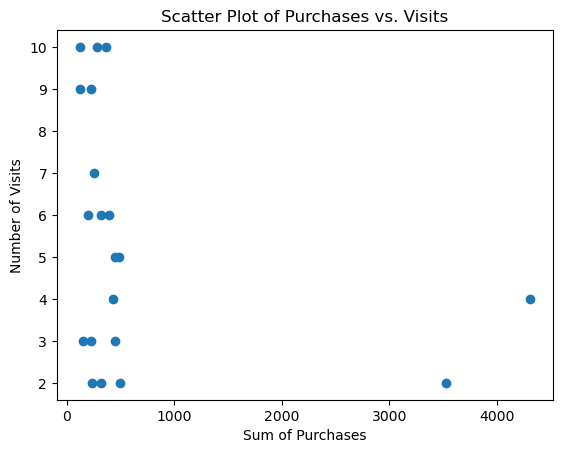

In [116]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

In [130]:

threshold = purchases_mean + 2 * std_purchases_sample

new_sum_purchases = [el for el in sum_purchases if el < threshold]
new_visits = [visits[i] for i in range(len(visits)) if sum_purchases[i] < threshold]



In [131]:
np.corrcoef(new_sum_purchases, new_visits)

array([[ 1.        , -0.36852121],
       [-0.36852121,  1.        ]])

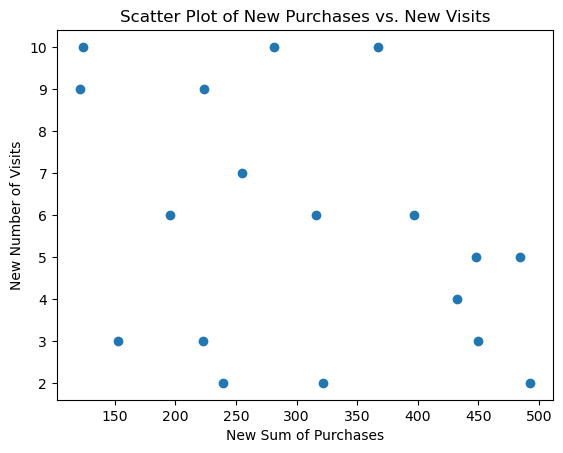

In [133]:
plt.scatter(new_sum_purchases, new_visits)
plt.title('Scatter Plot of New Purchases vs. New Visits')
plt.xlabel('New Sum of Purchases')
plt.ylabel('New Number of Visits');

З першого погляду людини яка не зв'язана з дата аналітикою, можу зробити висновок що залежності між кількістю візитів та сумою покупки немає, а якщо і є то дуже слабка. Графік немає чіткої тенденції, точки розташовані рівномірно по всій площі. Клієнти здійснюють покупки незалежно від кількості візитів, і ми це чітко побачили коли виключили викиди.